In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('penguins_size.csv', na_values=['NAME?'])
print(df.head(5))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [4]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [5]:
df_no_missing = df.dropna(axis=0)
print(df_no_missing.head(10))
df_no_missing.info()

   species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen              39.1             18.7              181.0   
1   Adelie  Torgersen              39.5             17.4              186.0   
2   Adelie  Torgersen              40.3             18.0              195.0   
4   Adelie  Torgersen              36.7             19.3              193.0   
5   Adelie  Torgersen              39.3             20.6              190.0   
6   Adelie  Torgersen              38.9             17.8              181.0   
7   Adelie  Torgersen              39.2             19.6              195.0   
12  Adelie  Torgersen              41.1             17.6              182.0   
13  Adelie  Torgersen              38.6             21.2              191.0   
14  Adelie  Torgersen              34.6             21.1              198.0   

    body_mass_g     sex  
0        3750.0    MALE  
1        3800.0  FEMALE  
2        3250.0  FEMALE  
4        3450.0  FEMALE  


In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
df1 = pd.DataFrame(data=imp.transform(df), columns=df.columns)
print(df.head(10))

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   
6  Adelie  Torgersen              38.9             17.8              181.0   
7  Adelie  Torgersen              39.2             19.6              195.0   
8  Adelie  Torgersen              34.1             18.1              193.0   
9  Adelie  Torgersen              42.0             20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  

In [9]:
df1.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


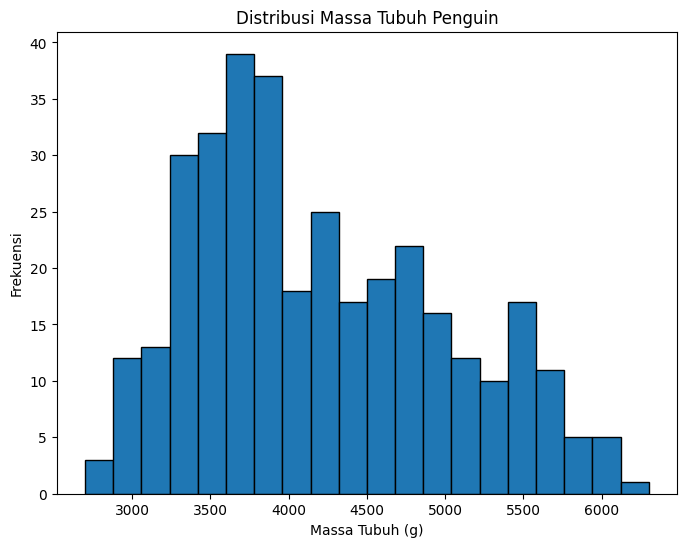

In [15]:
# Distribusi Massa Tubuh Penguin
plt.figure(figsize=(8, 6))
plt.hist(df1['body_mass_g'], bins=20, edgecolor='black')
plt.xlabel('Massa Tubuh (g)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Massa Tubuh Penguin')
plt.show()

# Interpretasi:
# 1. Distribusi Massa Tubuh Penguin : Histogram menunjukkan bahwa massa tubuh penguin umumnya tersebar pada kisaran tertentu, dengan sedikit outlier.

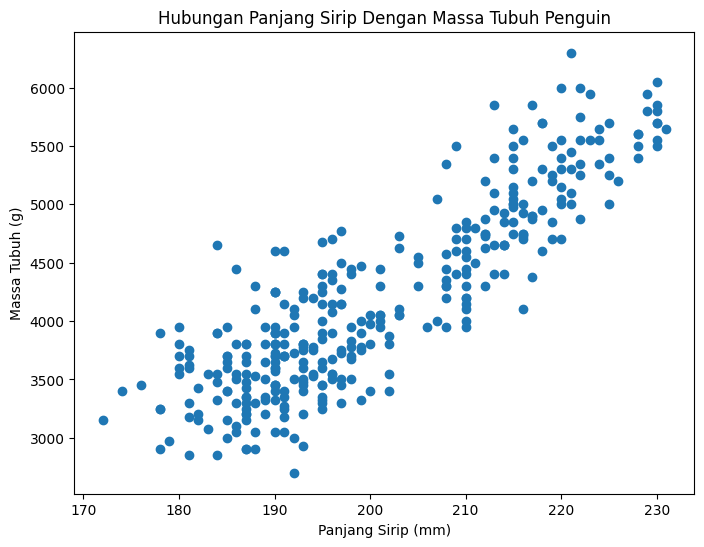

In [16]:
# Hubungan Panjang Sirip Dengan Massa Tubuh Penguin
plt.figure(figsize=(8, 6))
plt.scatter(df1['flipper_length_mm'], df1['body_mass_g'])
plt.xlabel('Panjang Sirip (mm)')
plt.ylabel('Massa Tubuh (g)')
plt.title('Hubungan Panjang Sirip Dengan Massa Tubuh Penguin')
plt.show()

# Interpretasi :
# 2. Panjang Sirip vs. Massa Tubuh: Scatterplot menunjukkan bahwa terdapat korelasi positif (memiliki hubungan) antara panjang sirip dan massa tubuh.
#                                  Artinya penguin dengan sirip yang lebih panjang cenderung memiliki massa tubuh yang lebih tinggi.

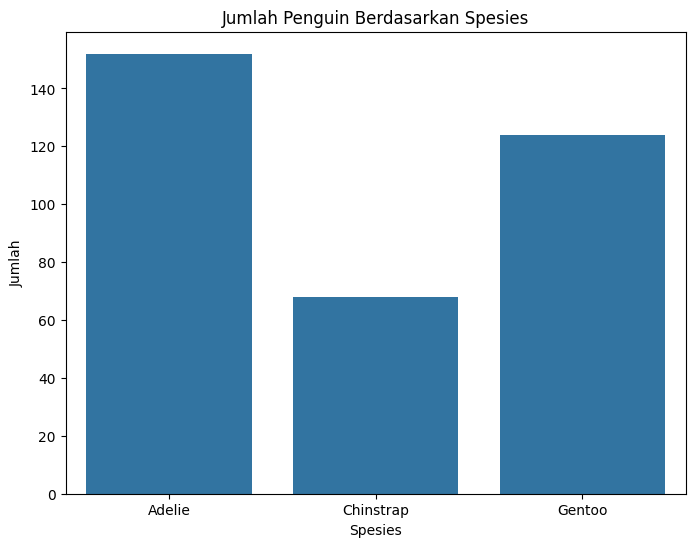

In [18]:
# Jumlah Penguin Berdasarkan Spesies
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=df1)
plt.xlabel('Spesies')
plt.ylabel('Jumlah')
plt.title('Jumlah Penguin Berdasarkan Spesies')
plt.show()

# Interpretasi
# 3. Jumlah Penguin Berdasarkan Spesies : Bar plot menunjukkan jumlah penguin yang dimiliki setiap spesies.
#                                         Ini membantu untuk melihat sebaran jumlah tiap spesies dalam data.